## Clustering

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
NAC_data = 'NAC_data.csv'
file = pd.read_csv(NAC_data)
NAC_df = pd.DataFrame(file)

### k-Means

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the data
X = NAC_df.drop(['Position'], axis=1)
X_encoded = pd.get_dummies(X)

# Handle NaN values using a simple imputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 2: Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 3: Add cluster labels to the original DataFrame
NAC_df['Cluster_KMeans'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(NAC_df.head())

/Users/daria/anaconda3/envs/block_b/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Unnamed: 0          Player              Team  \
0           0     P. Iemmello         Catanzaro   
1           1  J. Petriccione           Crotone   
2           2       T. Biasci         Catanzaro   
3           3   E. Volpicelli  Sangiuliano City   
4           4       A. Curcio         Catanzaro   

  Team within selected timeframe         Position   Age  Market value  \
0                      Catanzaro               CF  31.0        750000   
1                        Crotone  DMF, RDMF, RCMF  28.0        700000   
2                      Catanzaro     CF, LWF, AMF  28.0        550000   
3               Sangiuliano City     CF, RWF, AMF  30.0        500000   
4                      Catanzaro     CF, AMF, LWF  33.0        500000   

  Contract expires  Matches played  Minutes played  ...  \
0              NaN              38            3109  ...   
1       2024-06-30              36            3341  ...   
2       2024-06-30              38            2488  ...   
3       2024-06-30

### Hierarchial 

Ward method

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
columns_to_use = ['Age', 'Market value']
X = NAC_df[columns_to_use]

# Encode the data
X_encoded = pd.get_dummies(X)

# Handle NaN values using a simple imputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

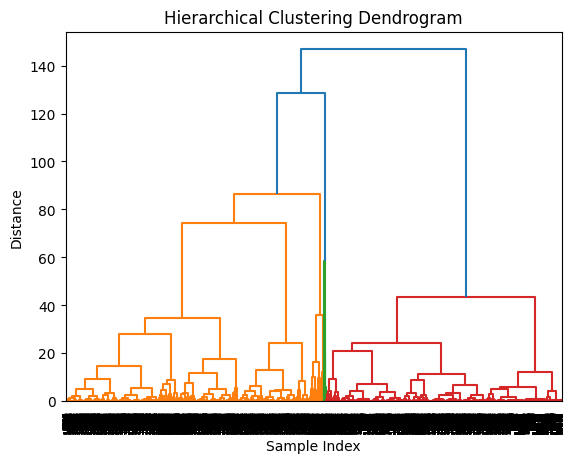

In [ ]:
# Step 2: Apply hierarchical clustering
# Linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Step 3: Create a dendrogram
dendrogram(linkage_matrix, orientation='top', labels=X_imputed.index, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Step 4: Cut the dendrogram to obtain clusters
num_clusters = 3  
labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add the cluster labels to the original DataFrame
NAC_df['Cluster'] = labels
print(NAC_df)

       Unnamed: 0          Player                   Team  \
0               0     P. Iemmello              Catanzaro   
1               1  J. Petriccione                Crotone   
2               2       T. Biasci              Catanzaro   
3               3   E. Volpicelli       Sangiuliano City   
4               4       A. Curcio              Catanzaro   
...           ...             ...                    ...   
16530       16530    C. Nguyen Do           Slavia Sofia   
16531       16531     K. Stoyanov           Slavia Sofia   
16532       16532    B. Bozhurkin             Hebar 1918   
16533       16533       M. Petkov  Ceahlăul Piatra Neamţ   
16534       16534     I. Mihaylov        Septemvri Sofia   

      Team within selected timeframe         Position   Age  Market value  \
0                          Catanzaro               CF  31.0        750000   
1                            Crotone  DMF, RDMF, RCMF  28.0        700000   
2                          Catanzaro     CF, LWF

Single method

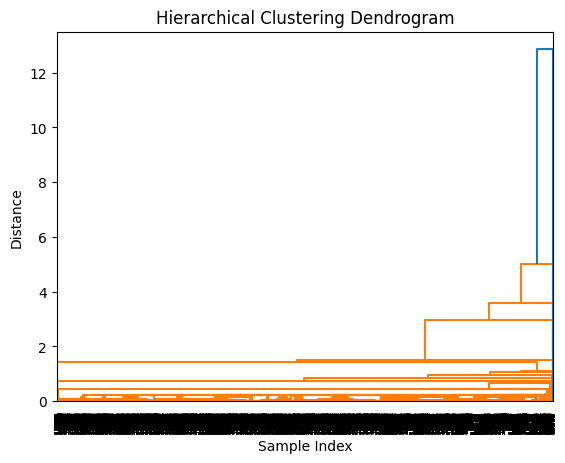

In [ ]:
# Step 2: Apply hierarchical clustering
linkage_matrix = linkage(X_scaled, method='single')  # You can choose a different linkage method

# Step 3: Create a dendrogram
dendrogram(linkage_matrix, orientation='top', labels=X_imputed.index, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Step 4: Cut the dendrogram to obtain clusters
num_clusters = 3  
labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

Complete method

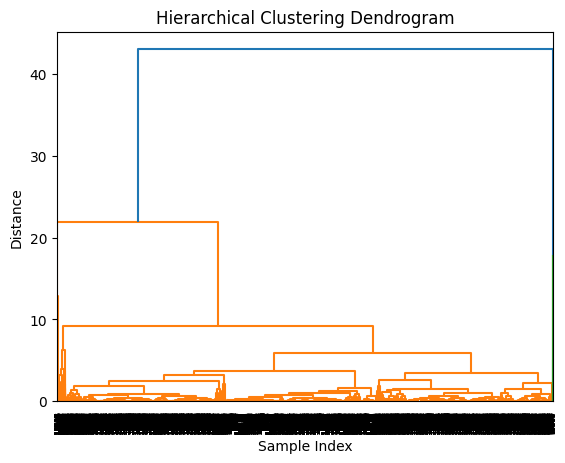

In [ ]:
# Step 2: Apply hierarchical clustering
linkage_matrix = linkage(X_scaled, method='complete')  # You can choose a different linkage method

# Step 3: Create a dendrogram
dendrogram(linkage_matrix, orientation='top', labels=X_imputed.index, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Step 4: Cut the dendrogram to obtain clusters
num_clusters = 3  
labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')